In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15,15)

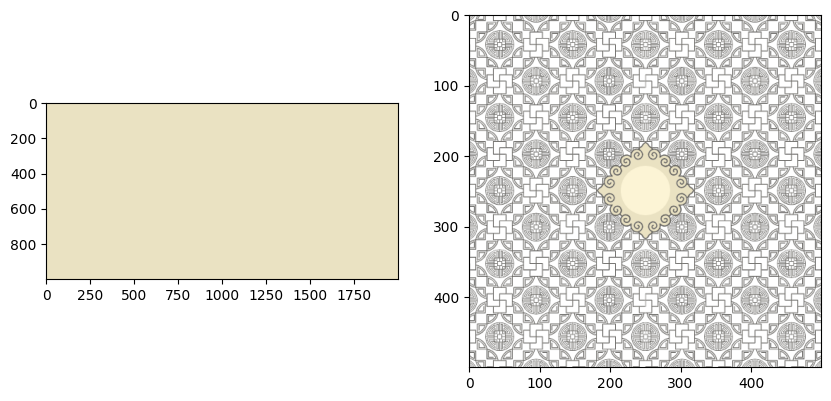

In [25]:
img_h = 1000
img_w = 2000
color = (194,226,234) #BGR
img = np.full((img_h,img_w,3),color,dtype=np.uint8)
pattern =  cv2.imread('data/pattern.png',cv2.IMREAD_UNCHANGED)
pattern_rgba = cv2.cvtColor(pattern,cv2.COLOR_BGRA2RGBA)

plt.figure(figsize = (10, 5))
plt.subplot(121); plt.imshow(img[:,:,::-1])
plt.subplot(122); plt.imshow(pattern_rgba);  

In [26]:
img.shape,pattern.shape

((1000, 2000, 3), (500, 500, 4))

Text(0.5, 1.0, 'Alpha Channel')

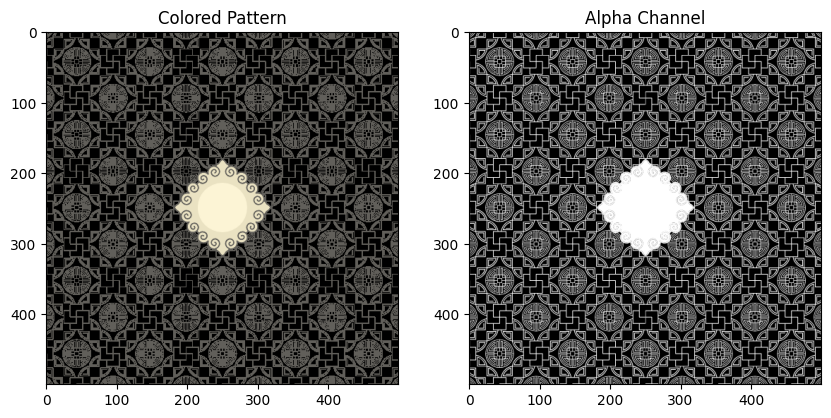

In [27]:
# Seperate the color and alpha channels
pattern_bgr = pattern[:,:,0:3]
pattern_alpha = pattern[:,:,3]

plt.figure(figsize = (10, 5))
plt.subplot(121); plt.imshow(pattern_bgr[:,:,::-1]); plt.title('Colored Pattern')
plt.subplot(122); plt.imshow(pattern_alpha); plt.title('Alpha Channel')

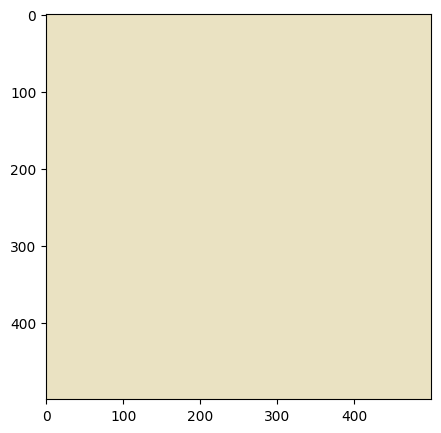

In [28]:
# Region of interest
roi = img[0:500,0:500]

# Display the ROI.
plt.figure(figsize = (5, 5))
plt.imshow(roi[:, :, ::-1]);

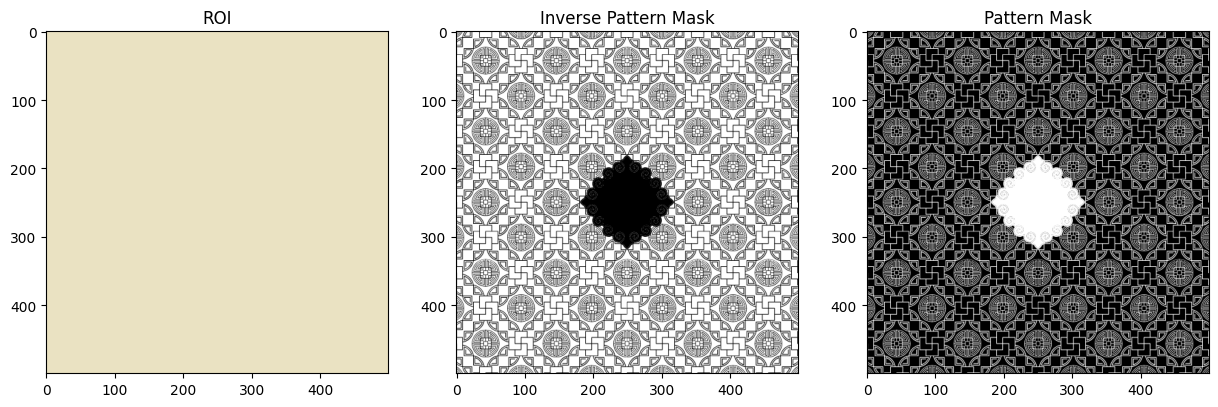

In [29]:
# Make 3 channel pattern mask to match with colr image channels
pattern_mask = cv2.merge([pattern_alpha,pattern_alpha,pattern_alpha])
pattern_mask_inv = cv2.bitwise_not(pattern_mask)

masked_roi = cv2.bitwise_and(roi,pattern_mask_inv)
plt.figure(figsize = [15, 10])

plt.subplot(231); plt.imshow(roi[:, :, ::-1]);           plt.title("ROI");
plt.subplot(232); plt.imshow(pattern_mask_inv[:, :, ::-1]); plt.title("Inverse Pattern Mask");
plt.subplot(233); plt.imshow(pattern_mask[:, :, ::-1]);    plt.title("Pattern Mask");

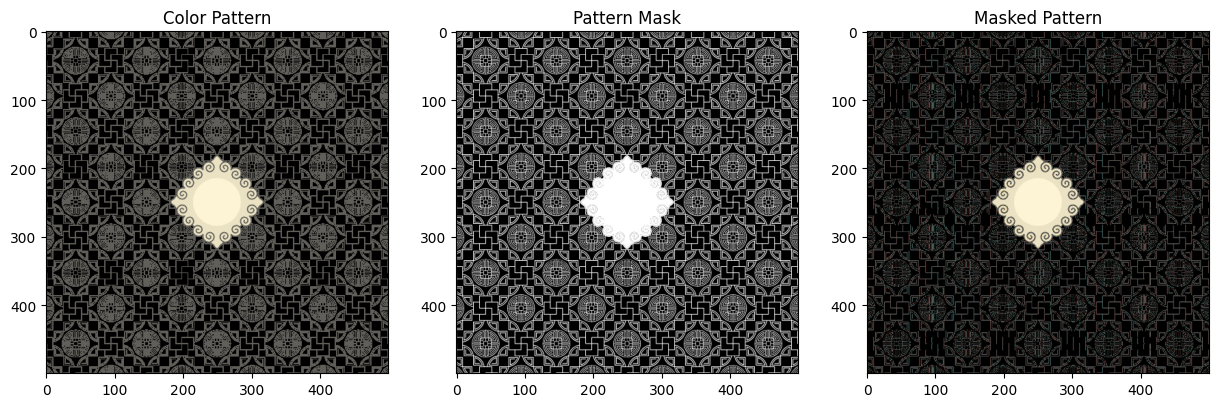

In [30]:
masked_pattern= cv2.bitwise_and(pattern_bgr,pattern_mask)
plt.subplot(234); plt.imshow(pattern_bgr[:, :, ::-1]);      plt.title("Color Pattern");
plt.subplot(235); plt.imshow(pattern_mask[:, :, ::-1]);     plt.title("Pattern Mask");
plt.subplot(236); plt.imshow(masked_pattern[:, :, ::-1]);   plt.title("Masked Pattern");

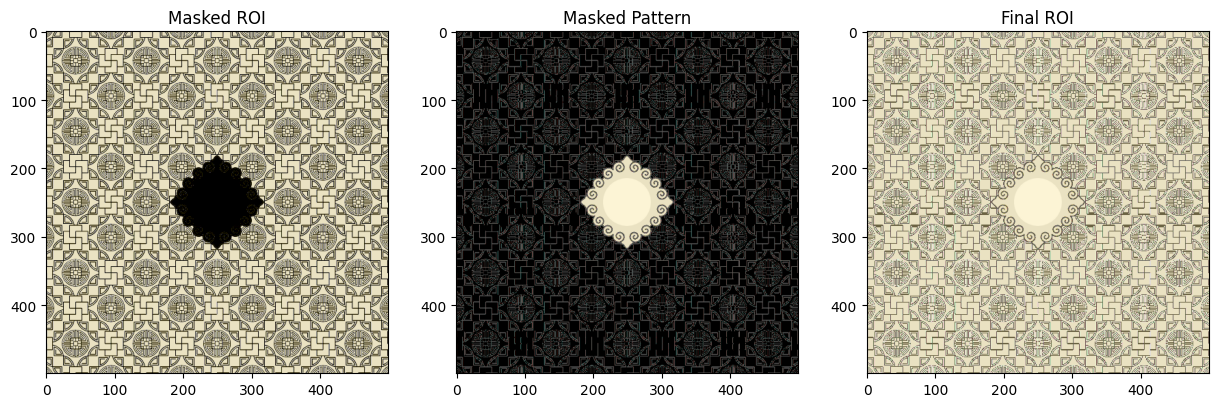

In [31]:
roi_final = cv2.bitwise_or(masked_roi,masked_pattern)

# Display the intermediate results.
plt.figure(figsize = [15, 10])

plt.subplot(131); plt.imshow(masked_roi[:,:,::-1]);  plt.title("Masked ROI");
plt.subplot(132); plt.imshow(masked_pattern[:,:,::-1]); plt.title("Masked Pattern");
plt.subplot(133); plt.imshow(roi_final[:,:,::-1]);   plt.title("Final ROI");

In [32]:
# create a copy of an image
roi_copy =  img.copy()
img_copy =  img.copy()

True

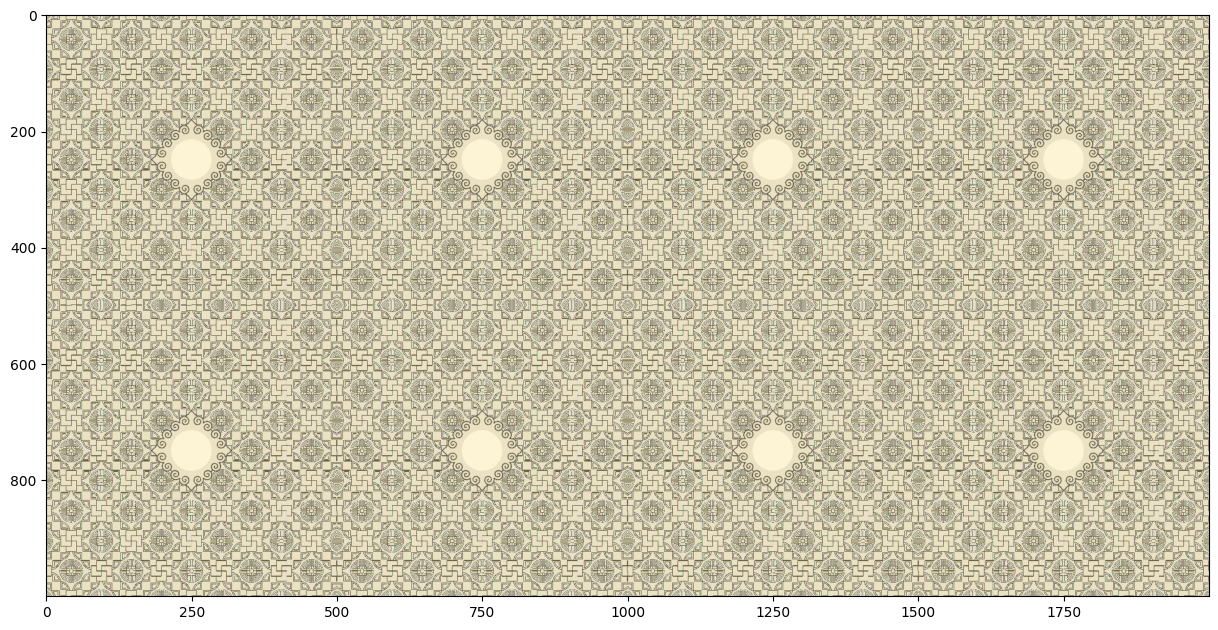

In [33]:
for i in range(0,img_w,500):
    for j in range(0,img_h,500):
        img_copy[j:j+500, i:i+500] = roi_final

plt.imshow(img_copy[:, :, ::-1])

# Save the final watermakred image.
cv2.imwrite('pattern.jpg', img_copy)